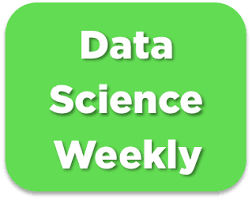

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

import plotly.express as px
from IPython.display import display

# Dataset exploring

In [2]:
data_init = pd.read_csv(r'G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\04_SUPERVISED_ML_Walmart_&_Conversion_rate\Conversion_rate\src\conversion_data_train.csv')


In [3]:
# The dataset is quite big : we create a sample 
data_sample = data_init.sample(10_000)

print("general info : ")
display(data_sample.info())
print()

print("Basics statistics: ")
data_desc = data_sample.describe(include='all')
display(data_desc)
print()
print("Display of dataset: ")
display(data_sample.head())

general info : 
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 176076 to 127760
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


None


Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.0000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5573,NaN,NaN,4974,NaN,NaN
mean,NaN,30.562100,0.6946,NaN,4.843100,0.031600
std,NaN,8.216745,0.4606,NaN,3.290405,0.174941
min,NaN,17.000000,0.0000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.0000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.0000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.0000,NaN,7.000000,0.000000



Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
176076,China,29,0,Ads,7,0
153302,US,32,0,Seo,2,0
49793,US,18,1,Direct,11,0
282027,China,39,0,Direct,10,0
214620,US,27,1,Ads,1,0


In [4]:
data_sample['converted'].value_counts()

converted
0    9684
1     316
Name: count, dtype: int64

# Separating label and distinguing features 

In [5]:
print("Separating labels from features...")
target_variable = "converted"

X = data_sample.drop(target_variable, axis = 1)
Y = data_sample.loc[:,target_variable]

print("...Done.")
print()
print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

numeric_features = list(X.select_dtypes(include=['float', 'int']).columns)
categorical_features = list(X.select_dtypes(exclude=['float', 'int']).columns)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Separating labels from features...
...Done.

Y : 
176076    0
153302    0
49793     0
282027    0
214620    0
Name: converted, dtype: int64

X :
       country  age  new_user  source  total_pages_visited
176076   China   29         0     Ads                    7
153302      US   32         0     Seo                    2
49793       US   18         1  Direct                   11
282027   China   39         0  Direct                   10
214620      US   27         1     Ads                    1
Found numeric features  ['age', 'new_user', 'total_pages_visited']
Found categorical features  ['country', 'source']


#### Visualising distribution of numeric variable

In [6]:
for f in numeric_features:
    fig = px.histogram(data_sample, f, color = 'converted', facet_row = 'converted', histnorm = 'probability')
    fig.show()

#### Visualising distribution of categorical variables

In [7]:
for i in range(len(categorical_features)):
    fig = px.histogram(data_sample[categorical_features[i]])
    fig.show()

#### Correlation matrix

In [8]:
corr_matrix = data_sample.corr(numeric_only = True).round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

# Our model

In [9]:
# Divide dataset Train set & Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")
print()

...Done.



In [10]:
numeric_transformer = Pipeline(
    steps=[ #liste de 2 tuples
        ("scaler",  StandardScaler()),  # put data of the column on scale for all columns where mean = 0, and value = std
    ]
)

## Create pipeline for columns with categorical features
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(drop="first")),  # first column will be dropped to avoid creating correlations between features
    ]
)

## Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done to the columns group selected
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


## Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)

## Preprocessings on test set
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')

## Encoding Y on train set (Y is categorical in this example)
print("Encoding labels...")
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)

## Encoding Y on test set
Y_test = encoder.transform(Y_test)
print("...Done")

Performing preprocessings on train set...
...Done.
Encoding labels...
...Done


# Train model performing GridSearchCV

In [22]:
print("Train model...")
pipe = Pipeline(steps=[
    ("poly", PolynomialFeatures()),
    ("logit", LogisticRegression())
])

params = {
    "poly__degree" : [1,2,3],
    "logit__C" : [1e-20, 1e-9, 1e-7, 1e-5, 1e-3],
    "logit__penalty" : ["l2", None]
}


gridsearch = GridSearchCV(pipe, param_grid = params, cv = 3)
gridsearch.fit(X_train, Y_train)

print("...Done.")


Train model...


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning:

Setting penalty=None will ignore the

...Done.


C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



In [23]:
print(gridsearch.cv_results_)
print()
# Finding out best parameters and score
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best score : ", gridsearch.best_score_)

{'mean_fit_time': array([0.00697875, 0.0173583 , 0.02407893, 0.01709811, 0.08403683,
       0.22177498, 0.0166057 , 0.02631903, 0.06414612, 0.01413298,
       0.08043329, 0.21743695, 0.01424901, 0.02170777, 0.05277983,
       0.0158755 , 0.07876682, 0.2287453 , 0.01600981, 0.02146459,
       0.05137157, 0.01420561, 0.08409643, 0.23905476, 0.01339674,
       0.01712124, 0.0509909 , 0.01607299, 0.08206423, 0.23727703]), 'std_fit_time': array([2.44611093e-03, 7.33909988e-03, 3.04756327e-03, 3.24755527e-03,
       1.52156224e-02, 1.52733701e-02, 4.62927163e-04, 1.58836930e-03,
       4.25909175e-03, 2.46952241e-05, 4.71751523e-03, 7.25780786e-03,
       2.93479478e-03, 1.05556892e-03, 4.82711915e-03, 2.34020606e-03,
       3.47386128e-03, 1.02357947e-02, 1.17508700e-03, 1.40505278e-03,
       4.58927245e-03, 1.33066394e-03, 1.01163199e-02, 2.05503867e-02,
       2.07667201e-03, 7.75493665e-04, 3.08307701e-03, 2.05919137e-03,
       4.47482708e-03, 1.88950400e-02]), 'mean_score_time': array

In [24]:
# Train final model
gridsearch_best1 = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=1)),
    ("logit", LogisticRegression(penalty=None))
])

gridsearch_best1.fit(X_train, Y_train)

print("...Done.")

...Done.


In [25]:
# Predictions on training set
Y_train_pred = gridsearch_best1.predict(X_train)
print("...Done.")
print(Y_train_pred)

...Done.
[0 0 0 ... 0 0 0]


In [26]:
# Predictions on test set
Y_test_pred = gridsearch_best1.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [27]:
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7027027027027027
f1-score on test set :  0.8421052631578947


In [28]:
# Confusion matrix
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))

Confusion matrix on train set : 
[[7712   35]
 [  97  156]]

Confusion matrix on test set : 
[[1934    3]
 [  15   48]]


In [18]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

gridsearch_best1.fit(X,Y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('logit', LogisticRegression(penalty=None))])

In [19]:
# Read data without labels
data_without_labels = pd.read_csv(r'G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\04_SUPERVISED_ML_Walmart_&_Conversion_rate\Conversion_rate\src\conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features
# used by your best classifier)
X_without_labels = data_without_labels#.loc[:, features_list]

print("Encoding categorical features and standardizing numerical features...")
X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Encoding categorical features and standardizing numerical features...
...Done
[[-0.30544245 -1.49803873  3.39839894  0.          1.          0.
   0.          1.        ]
 [-1.03489353  0.66753948  0.04815969  0.          1.          0.
   1.          0.        ]
 [ 0.18085828  0.66753948 -1.17010913  0.          0.          0.
   0.          1.        ]
 [ 0.18085828  0.66753948  0.35272689  0.          0.          1.
   0.          0.        ]
 [-0.67016799 -1.49803873 -0.56097472  0.          0.          0.
   0.          1.        ]]


In [20]:
# data = {
#     'converted': gridsearch_best1.predict(X_without_labels)
# }

# Y_predictions = pd.DataFrame(columns=['converted'],data=data)
# Y_predictions.to_csv(r'G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\PROJETS\04_SUPERVISED_ML\Conversion rate\conversion_data_test_predictions_MATHIAS_SAMSON_model_2.csv', index=False)
